In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


# Import Libraries

In [0]:
import numpy as np
import pandas as pd
import pandas.testing as tm
import matplotlib.pyplot as plt
import seaborn as sns

# preprocessing helpers
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# Modelling Helpers :
from sklearn.preprocessing import Normalizer , scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV , KFold , cross_val_score
from sklearn import model_selection
from sklearn.metrics import roc_curve, auc, recall_score, precision_score, f1_score , roc_auc_score
from sklearn.metrics import plot_roc_curve, plot_confusion_matrix, plot_precision_recall_curve
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize

#Classifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, VotingClassifier
from sklearn.ensemble import ExtraTreesClassifier, IsolationForest
from sklearn.ensemble import StackingClassifier
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

import time

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Load Datasets

In [0]:
# Load Full Dataset

train = pd.read_csv('gdrive/My Drive/RandomProjects/Fashion MNIST/fashion-mnist_train.csv')
test = pd.read_csv('gdrive/My Drive/RandomProjects/Fashion MNIST/fashion-mnist_test.csv')

df_train = train.copy()
df_test = test.copy()

print("Original Shape of Train Dataset:", df_train.shape[0], 'X' , df_train.shape[1])
print("Original Shape of Test Dataset:", df_test.shape[0], 'X' , df_test.shape[1])

# Seperate ID numbers and target features from train and test dataset

train_feat = df_train.iloc[:, 1:]
train_lab = df_train.label

test_feat = df_test.iloc[:, 1:]
test_lab = df_test.label


print("\nTrain Features:", train_feat.shape[0], 'X' , train_feat.shape[1], '\nTrain Labels:' , train_lab.shape[0], 'X 1')

print("\nTest Features:", test_feat.shape[0], 'X' , test_feat.shape[1], '\nTest Labels:' , test_lab.shape[0], 'X 1')




Original Shape of Train Dataset: 60000 X 785
Original Shape of Test Dataset: 10000 X 785

Train Features: 60000 X 784 
Train Labels: 60000 X 1

Test Features: 10000 X 784 
Test Labels: 10000 X 1


# Data Exploration

## Check for Null Values

In [0]:
# For Train

if(df_train.isnull().any().sum() == 0):
    print("No NaN Values in Train Data")

# For Test

if(df_test.isnull().any().sum() == 0):
    print("\nNo NaN Values in Test Data")

No NaN Values in Train Data

No NaN Values in Test Data


## Check all the unique target labels in dataset

In [0]:
labels = df_train.label.unique()
print("The labels in the Dataset are:", sorted(labels))

The labels in the Dataset are: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


## Plot Random images from dataset

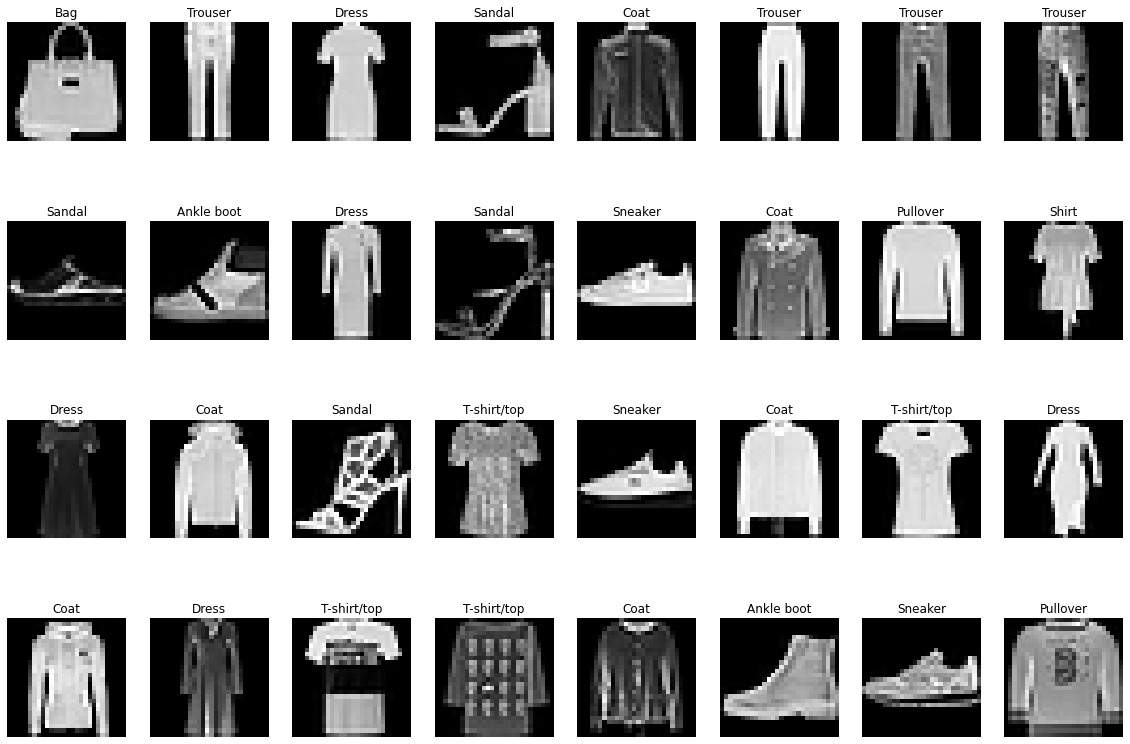

In [0]:
all_clothes = {0 : 'T-shirt/top', 1 : 'Trouser', 2 : 'Pullover', 3 : 'Dress',
                4 : 'Coat', 5 : 'Sandal', 6 : 'Shirt', 7 : 'Sneaker', 8 : 'Bag',
                9 : 'Ankle boot'}

# Plot images from training data
fig, axes = plt.subplots(4, 8, figsize = (20, 14))

for row in axes:
    for axe in row:
        index = np.random.randint(60000)
        img = df_train.drop('label', axis=1).values[index].reshape(28,28)
        sample = df_train['label'][index]
        axe.imshow(img, cmap='gray')
        axe.set_title(all_clothes[sample])
        axe.set_axis_off()

## Check for Class Imbalance

Here, we plot the distribution of all classes to see if they are balanced or not. An imbalalced dataset will be poor for a macine learning model training.

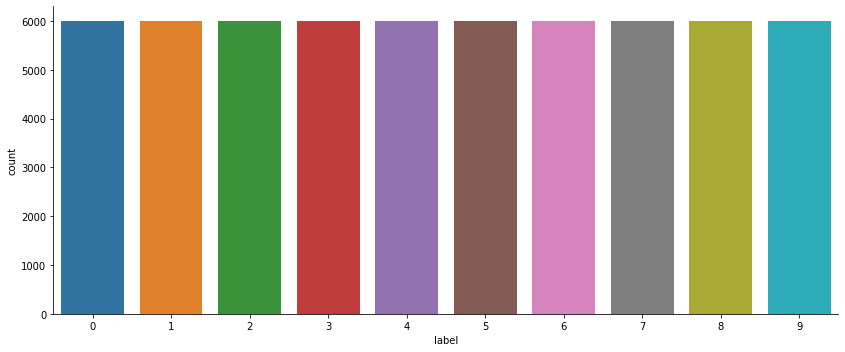

In [0]:
sns.catplot(x='label', data=df_train, kind='count', height=5, aspect= 2.33)

We can see that all classes are equally distributed.
So, there is **NO NEED** for **OverSampling** or **UnderSampling**.

# Data Preprocessing

## Normalize the dataset

* Data samples need to be scaled down to [0,1] in order for Optimization Algorithms to work much faster. Here, we also acheive Zero Mean and Unit Variance.

* Normalization is carried out as follows: 
> x = (x - min) / (max - min) ; Here min= 0 and max= 255

In [0]:
# Normalize Full Train and Test Feature data

train_feat = train_feat.astype("float32")/255

test_feat = test_feat.astype("float32")/255

## Dimensionality Reduction using PCA

* We will use Principal Component analysis as a Dimensionality reduction technique to reduce the no. of features. <br>
* It is helpful to use a Dimensionality reduction technique before applying the data to (classical/ non-CNN based) machine learning algorithms as it significantly reduces computational cost and time.

Text(0.5, 1.0, 'EVR with First 20 Components')

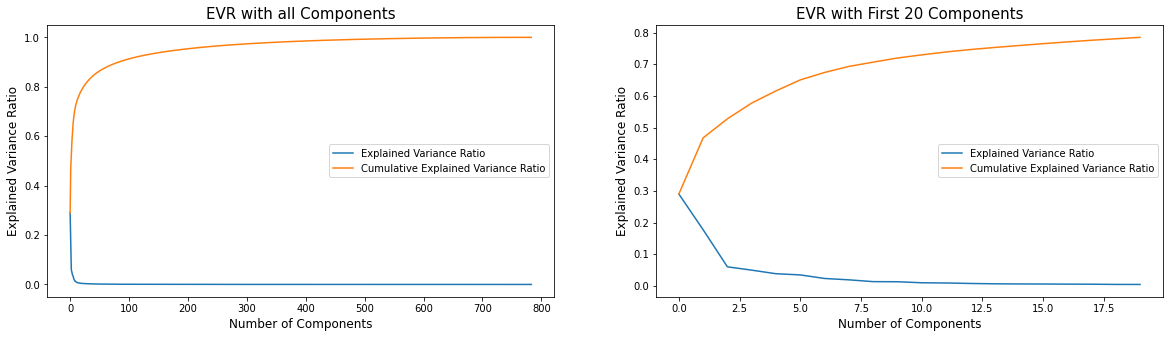

In [0]:
# Apply PCA to train and test data

pca = PCA().fit(train_feat)

# Plot Explained Variance Ratio
evr = pca.explained_variance_ratio_

# print("The Explained Variance Ratio of First 20 Components is:\n ", evr[:20])

fig = plt.figure(figsize = (20, 5))
plt.subplot(1, 2, 1)
plt.plot(evr, label= 'Explained Variance Ratio')
plt.plot(np.cumsum(evr), label= 'Cumulative Explained Variance Ratio')
plt.xlabel('Number of Components', fontsize= 12)
plt.ylabel('Explained Variance Ratio', fontsize= 12)
plt.legend()
plt.title("EVR with all Components", fontsize= 15)

plt.subplot(1, 2, 2)
plt.plot(evr[:20], label= 'Explained Variance Ratio')
plt.plot(np.cumsum(evr[:20]), label= 'Cumulative Explained Variance Ratio')
plt.xlabel('Number of Components', fontsize= 12)
plt.ylabel('Explained Variance Ratio', fontsize= 12)
plt.legend()
plt.title("EVR with First 20 Components", fontsize= 15)




Shape of PCA transformed Train Data:  60000 X 20
Shape of PCA transformed Test Data:  10000 X 20


 Plot of Projected Components 




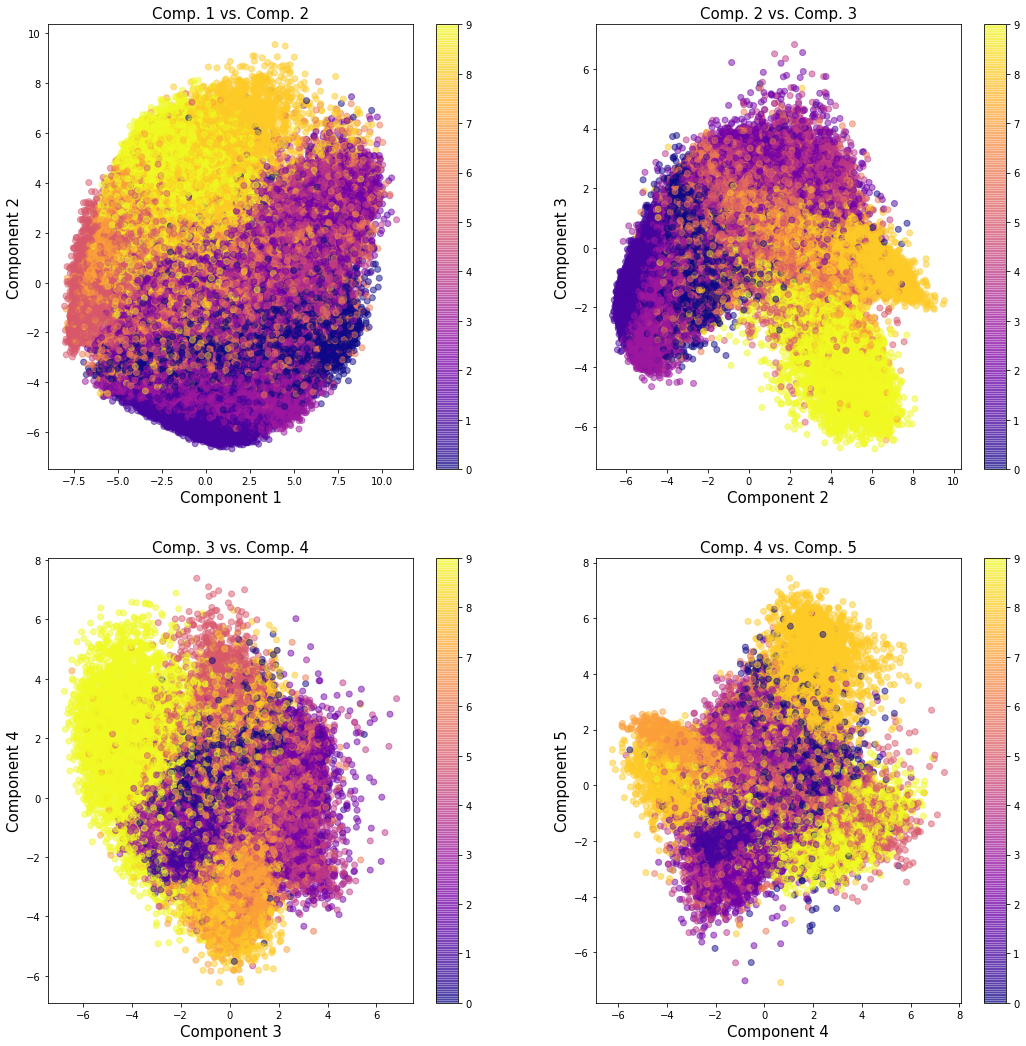

In [0]:

# PCA Transform on whole Train and Test Data 
train_pca = pca.transform(train_feat)
test_pca = pca.transform(test_feat)

# Select only first 15 pca components
train_pca = train_pca[:, :20]
test_pca = test_pca[:, :20]

# Convert to Dataframes
train_pca = pd.DataFrame(train_pca)
test_pca = pd.DataFrame(test_pca)

print("\nShape of PCA transformed Train Data: " , train_pca.shape[0], "X" ,  train_pca.shape[1] )
print("Shape of PCA transformed Test Data: " , test_pca.shape[0], "X" ,  test_pca.shape[1])

# Plot projections of obtained principal components of train data

# Join Targets on PCA Transformed Data for scatter plot
pca_tr = train_pca.join(train_lab)

print('\n\n Plot of Projected Components \n\n')
# Plot the ScatterPlot
fig = plt.figure(figsize = (18, 18))

for i in range(0, 4):
    plt.subplot(2, 2, i+1)
    plt.scatter(pca_tr[i], pca_tr[i+1], c=pca_tr.label, alpha=0.5, cmap = 'plasma')
    plt.xlabel('Component '+ str(i+1), fontsize = 15)
    plt.ylabel('Component ' + str(i+2), fontsize = 15)
    plt.colorbar();
    plt.title('Comp. ' + str(i+1) + ' vs. Comp. ' + str(i+2), fontsize = 15)
